# Data Analyst Nanodegree 
# Project 2: Investigating a dataset

For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.

# Investigating the Titanic Dataset

#### VARIABLE DESCRIPTIONS:
- **survival** = Survival 
<dd>(0 = No; 1 = Yes)</dd>
- **pclass** =          Passenger Class 
<dd>(1 = 1st; 2 = 2nd; 3 = 3rd)</dd>
- **name** =            Name
- **sex** =            Sex
- **age**   =          Age
- **sibsp** =          Number of Siblings/Spouses Aboard
- **parch**    =       Number of Parents/Children Aboard
- **ticket**    =      Ticket Number
- **fare**       =     Passenger Fare
- **cabin**      =     Cabin
- **embarked**   =     Port of Embarkation 
<dd>(C = Cherbourg; Q = Queenstown; S = Southampton)</dd>

**SPECIAL NOTES**:
- Pclass is a proxy for socio-economic status (SES)
<dd>1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower</dd>

- Age is in Years; Fractional if Age less than One (1)
<dd>If the Age is Estimated, it is in the form xx.5</dd>

- With respect to the family relation variables (i.e. sibsp and parch)some relations were ignored.  The following are the definitions used for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

- Parent:   Mother or Father of Passenger Aboard Titanic

- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

- Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Resources:
- http://stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column = find most frequent values in a column

## Question 1: What factors made people most likely to survive? 
Was Sex, Age, SES, Number of Siblings/Spouses or Number of parents/children the most important factor to surviving?

## Question 2: Is there a relationship between Age and Fare Cost?

### Description

For the project, I broke down the individual datasets by column and used value_counts() to see what the ratios of factors (such as sex/SES/age) were. I then computed the ratio of survivors to total people in each to find the proportion of people that survived. I used this to find out how important a factor was in survival by computing the largest/smallest proportion in each factor to determine the amount someone was likely to survive by being in that factor. This was what I then used to determine the most important factor.

### Data Wrangling
I did data wrangling for Age as it only had values for 714 passengers whereas the rest of the dataframe had values for 891. I removed all rows in the data where age didn't exist but only when doing analysis on age, I used the entire data set for the rest of the factors.

### Limitations
The limitations in this report are determining causation through speculation and correlation through ratios of survivors changing. I decided on the most important factor as the factor which had the greatest multiple resulting in surviving.

In [2]:
# Imports for python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Reading in csv files
data = pd.read_csv('titanic_data.csv')
dropped = data.dropna()

### Helper Functions

In [4]:
def correlation(x, y):
    '''
    Computes the correlation between the two input variables.
    Each input is either a NumPy array or a Pandas Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    ddof = 1 because this is the whole population so don't need bessels correction.
    '''
    standardize_x = (x - x.mean())/x.std()
    standardize_y = (y - y.mean())/y.std()

    r = (standardize_x * standardize_y).mean()

    return r

In [5]:
def standardize_data(values):
    '''
    This function returna a standardized version of the given values,
    which will be in a NumPy array. 
    
    Each value is translated into the number of standard deviations that
    value is away from the mean of the data.
    
    A positive number indicates a value higher than the mean,
    and a negative number indicates a value lower than the mean.
    '''
    
    # = mean of sample - pop mean / sd
    standardized = (values - values.mean())/values.std()
    
    return standardized

In [6]:
def find_ratio(first, second):
    return (first/second)

In [7]:
def convert_age(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teen'
    elif age <= 30:
        return 'YoungAdult'
    elif age <= 45:
        return 'MidAdult'
    elif age <= 60:
        return 'OldAdult'
    else:
        return 'Elderly'

def convert_ages(ages):
    '''
    Converts DataFrame of numerical ages to life categories. Returns new DataFrame with converted season.
    
    Conversion rule is:
        0-12  -> Child
        13-19 -> Teen
        20-30 -> YoungAdult 
        31-45 -> MidAdult
        46-60 -> OldAdult
        60+   -> Elderly
    '''
    new_age = ages.apply(convert_age)
    return new_age

### 1.1) Sex

In [8]:
## Survivor and non-survivor data
s_data = data.loc[data['Survived'] == 1]

In [9]:
## Number of female and male surivors/non-survivors
sex_values = data['Sex'].value_counts()
sex_s_values = s_data['Sex'].value_counts() + 0.0

In [10]:
sex_s_ratio = find_ratio(sex_s_values, sex_values) # ratio of male/female survivors to total

print sex_s_ratio
print ""
print sex_s_ratio['female']/sex_s_ratio['male']

female    0.742038
male      0.188908
Name: Sex, dtype: float64

3.92803716473


As can be seen in the associated values, 74.2% of females survived compared to only 18.9% of males. Therefore females were 3.92 times more likely to survive compared to males. This is likely because they were given priority on life boats.

### 1.2) Age

In [11]:
## Cleaning up the data (714 entries for Age even though there are 891 passengers)
age_data = data[np.isfinite(data['Age'])]

Populating the interactive namespace from numpy and matplotlib


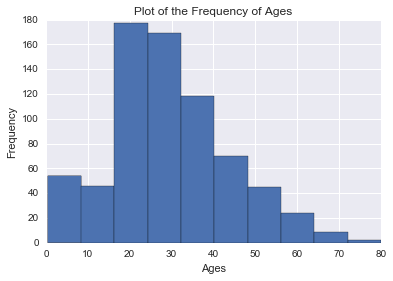

In [12]:
## Seeing the frequency of each age category 
%pylab inline
age_data['Age'].plot(kind='hist')

plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Plot of the Frequency of Ages')

In [13]:
## Converting ages into category's to do analysis on
converted = convert_ages(age_data['Age'])
age_data['Age'] = converted

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
## Age Survivor and non-survivor data
age_s_data = age_data.loc[age_data['Survived'] == 1]

In [15]:
## Number of surivors/non-survivors in each age category
age_values = age_data['Age'].value_counts()
age_s_values = age_s_data['Age'].value_counts() + 0.0

In [16]:
age_s_ratio = find_ratio(age_s_values, age_values) # ratio of age type survivors to total

print age_s_ratio.sort_values(inplace=False)
print ""
print (age_s_ratio/age_s_ratio['Elderly']).sort_values(inplace=False)

Elderly       0.227273
YoungAdult    0.355102
OldAdult      0.407407
Teen          0.410526
MidAdult      0.425743
Child         0.579710
Name: Age, dtype: float64

Elderly       1.000000
YoungAdult    1.562449
OldAdult      1.792593
Teen          1.806316
MidAdult      1.873267
Child         2.550725
Name: Age, dtype: float64


Populating the interactive namespace from numpy and matplotlib


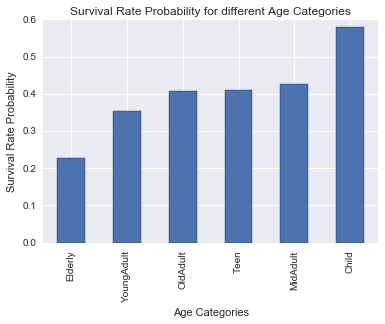

In [17]:
%pylab inline
import matplotlib.pyplot as plt

age_s_ratio.sort_values(inplace=False).plot(kind='bar')

plt.xlabel('Age Categories')
plt.ylabel('Survival Rate Probability')
plt.title('Survival Rate Probability for different Age Categories')

In [18]:
s_standard = standardize_data(age_s_ratio)

print s_standard.sort_values(inplace=False)

Elderly      -1.523702
YoungAdult   -0.402298
OldAdult      0.056559
Teen          0.083920
MidAdult      0.217407
Child         1.568114
Name: Age, dtype: float64


As can be seen in the associated values and plots:
- The elderly had a 22.7% chance of surviving
- Young adults had a 35.5% chance of surviving
- Old adults had a 40.7% chance of surviving
- Teens had a 41.1% chance of surviving
- Mid adults had a 42.6% chance of surviving
- Children had a 58.0% chance of surviving

Therefore children were 2.55 times more likely to survive than the elderly and were the most likely age group to survive. Again because they were given priority boarding on the life boats. Midadults were the next most likely as they were probably allowed to board with their children followed by teens, however more information is needed to determine this.

By looking at the z scores for the data, none of the results are statistically significant (Child survival has a p value of 0.1169 which is not large enough to be significant by conventional criteria, see http://www.graphpad.com/quickcalcs/pValue2/ ). 

***Plots: There is a histogram plot of the frequency of ages and there is a bar plot of survival rate ratios for age.***

### 1.3) Socio Economic Status (SES)

In [19]:
## Number of female and male surivors/non-survivors
ses_values = data['Pclass'].value_counts()
ses_s_values = s_data['Pclass'].value_counts() + 0.0

In [20]:
ses_s_ratio = find_ratio(ses_s_values, ses_values) # ratio of SES survivors to total

print ses_s_ratio
print ""
print (ses_s_ratio/ses_s_ratio[3]).sort_values(inplace=False, ascending=False)

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

1    2.597884
2    1.950904
3    1.000000
Name: Pclass, dtype: float64


As can be seen in the values and plots:
- The First Class had a 62.3% chance of surviving
- The Second Class had a 47.3% chance of surviving
- The Third Class had a 24.2% chance of surviving

Therefore passengers from First Class were 2.6 times more likely to survive than passengers from Third Class.

### 1.4) Number of Siblings/Spouse

In [21]:
## Number of sib/spouse surivors/non-survivors
sibsp_values = data['SibSp'].value_counts()
sibsp_s_values = s_data['SibSp'].value_counts() + 0.0

In [22]:
sibsp_s_ratio = find_ratio(sibsp_s_values, sibsp_values) # ratio of Siblings/spouse survivors to total

print sibsp_s_ratio
print ""
print (sibsp_s_ratio/sibsp_s_ratio[4]).sort_values(inplace=False, ascending=False)

0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64

1    3.215311
2    2.785714
0    2.072368
3    1.500000
4    1.000000
5         NaN
8         NaN
Name: SibSp, dtype: float64


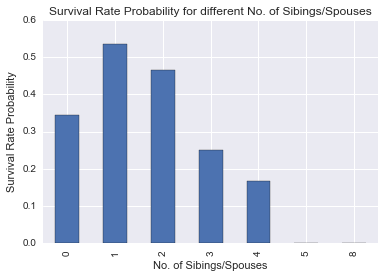

In [23]:
sibsp_s_ratio.plot(kind='bar')

plt.xlabel('No. of Sibings/Spouses')
plt.ylabel('Survival Rate Probability')
plt.title('Survival Rate Probability for different No. of Sibings/Spouses')

There is a positive skew between number of siblings/spouse and surviving onboard as having 0-2 siblings/spouse onboard increased the chances of survival by 2-3 times.


### 1.5) Number of Parents/Children

In [24]:
## Number of female and male surivors/non-survivors
parch_values = data['Parch'].value_counts()
parch_s_values = s_data['Parch'].value_counts() + 0.0

In [25]:
parch_s_ratio = find_ratio(parch_s_values, parch_values) # ratio of parents/children survivors to total

print parch_s_ratio.sort_values(inplace=False)
print ""
print (parch_s_ratio/parch_s_ratio[5]).sort_values(inplace=False, ascending=False)

5    0.200000
0    0.343658
2    0.500000
1    0.550847
3    0.600000
4         NaN
6         NaN
Name: Parch, dtype: float64

3    3.000000
1    2.754237
2    2.500000
0    1.718289
5    1.000000
4         NaN
6         NaN
Name: Parch, dtype: float64


There is a positive skew between having children/parents onboard and surviving as having 1-3 children onboard increased the chances of survival by 2.5-3 times.

### 1.6) Age & Sex

In [26]:
## Finding the values of each sex within each age category
elderly = age_s_data.loc[age_s_data['Age'] == 'Elderly']['Sex'].value_counts() + 0.0
youngad = age_s_data.loc[age_s_data['Age'] == 'YoungAdult']['Sex'].value_counts() + 0.0
oldad = age_s_data.loc[age_s_data['Age'] == 'OldAdult']['Sex'].value_counts() + 0.0
teen = age_s_data.loc[age_s_data['Age'] == 'Teen']['Sex'].value_counts() + 0.0
midad = age_s_data.loc[age_s_data['Age'] == 'MidAdult']['Sex'].value_counts() + 0.0
child = age_s_data.loc[age_s_data['Age'] == 'Child']['Sex'].value_counts() + 0.0

In [27]:
## Finding the values of each sex within each age category and putting them into dataframes
maleser = [elderly['male'], youngad['male'], oldad['male'], teen['male'], midad['male'], child['male']]
femaleser = [elderly['female'], youngad['female'], oldad['female'], teen['female'], midad['female'], child['female']]

types = ['Elderly','YoungAdult','OldAdult', 'Teen' ,'MidAdult', 'Child']

malef = pd.DataFrame({'males':maleser, 'category': types}, index = ['Elderly','YoungAdult','OldAdult', 'Teen' ,'MidAdult', 'Child'])
femalef = pd.DataFrame({'females':femaleser, 'category': types}, index = ['Elderly','YoungAdult','OldAdult', 'Teen' ,'MidAdult', 'Child'])

In [28]:
## Merging the female and male dataframes.
merged = malef.merge(femalef, on=['category'], how='inner', left_index=True)

In [29]:
## Finding values for males and females in their associated age groups.
male_values = age_data.loc[age_data['Sex'] == 'male']['Age'].value_counts()
female_values = age_data.loc[age_data['Sex'] == 'male']['Age'].value_counts()

In [30]:
male_ratio = find_ratio(merged['males'], male_values)
female_ratio = find_ratio(merged['females'], female_values)

print "Males:"
print male_ratio.sort_values(inplace=False, ascending=False)# ratio of male age type survivors to total
print ""
print "Females:"
print female_ratio.sort_values(inplace=False, ascending=False) # ratio of female age type survivors to total
print ""

Males:
Child         0.567568
MidAdult      0.224806
OldAdult      0.185185
YoungAdult    0.160494
Elderly       0.105263
Teen          0.096154
dtype: float64

Females:
Teen          0.653846
Child         0.513514
MidAdult      0.441860
OldAdult      0.425926
YoungAdult    0.376543
Elderly       0.157895
dtype: float64



In [31]:
print "Males:"
print (male_ratio/male_ratio['Teen']).sort_values(inplace=False, ascending=False)
print ""
print "Females:"
print (female_ratio/female_ratio['Elderly']).sort_values(inplace=False, ascending=False)

Males:
Child         5.902703
MidAdult      2.337984
OldAdult      1.925926
YoungAdult    1.669136
Elderly       1.094737
Teen          1.000000
dtype: float64

Females:
Teen          4.141026
Child         3.252252
MidAdult      2.798450
OldAdult      2.697531
YoungAdult    2.384774
Elderly       1.000000
dtype: float64


The age groups with the lowest ratio of males to females were more likely to survive (3 lowest ratios had the 3 highest survival rates).

As can be seen in the associated values and plots:
- The elderly males/females had a 10.5%/15.8% chance of surviving
- Young adult males/females had a 16.0%/37.7% chance of surviving
- Old adults males/females had a 18.5%/42.6% chance of surviving
- Teen males/females had a 9.6%/65.4% chance of surviving
- Mid adult males/females had a 22.5%/44.2% chance of surviving
- Child males/females had a 56.8%/51.4% chance of surviving

This means male Children were the most likely to survive and were 6 times more likely to survive than male Teens and 3 times more likely to survive than anyone else male. Female teens were most likely to survive being 4.1 times more likely to survive than the elderly however, child females were also likely to survive (3.1 times more likely than the elderly).

As can be seen from the values above, females from any age group were almost always more likely to survive then men (other than children - very close).

### 2) Age & Fare

In [32]:
## Resetting Age_data to original age values instead of age categorys
age_data = data[np.isfinite(data['Age'])]

In [33]:
print correlation(age_data['Fare'], age_data['Age'])

0.0959321445817


Populating the interactive namespace from numpy and matplotlib


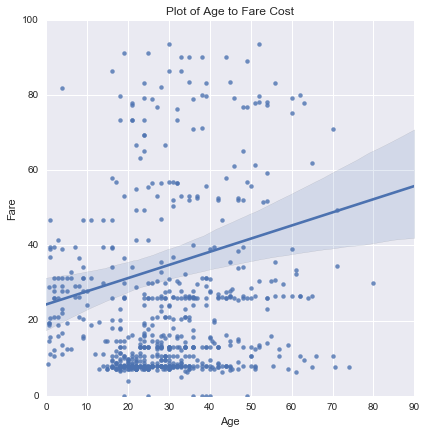

In [39]:
%pylab inline
import matplotlib.pyplot as plt

g = sns.pairplot(age_data, size=6,
             #vars = ['Age','Fare'],
             x_vars = ['Age'],
             y_vars = ['Fare'],
             kind = 'reg')
g.set(xlim=(0, None))
g.set(ylim=(0,100))

plt.title('Plot of Age to Fare Cost')

The r value for Age and Fare is only 0.096, which implies there is a small correlation between age and fare. The plot corroborates this by having a a slight increase in gradient in the Line of Best Fit.

## Conclusion
### Question 1 - What factors made people most likely to survive? 
From my analysis, the factor most associated with survival was sex (females were almost 4 times more likely to survive than males). Age & Sex had a minor impact for males with only the children substantially surviving more, whereas females were consistently more likely to survive than males regardless of age group.

I believe females were more likely to survive as they were given priority seating on life boats as well as children.

### Question 2: Is there a relationship between Age and Fare Cost?
Both the plot and r values indicates there's a slight positive correlation between age and fare.